# Word Vectors Gone Wrong: Fixing Gender Stereotypes in Language Models

## Problem Description

Language models process words as arrays of numbers, called word vectors (or word embeddings). These vectors are created based on the usage of the words in context, so they capture the distributional properties of words. Word vectors can be conceptualized as unique coordinates in a multi-dimensional space, with the distance between them capturing the semantic and syntactic relations between words.

In a seminal [article](https://aclanthology.org/P16-1158/) Ekaterina Vylomova and colleagues show that word vectors trained on English data exhibit a curious property: the spatial difference between the vectors of 'king' and 'queen' is the same as the difference between the vectors of 'man' and 'woman'. This difference essentially captures **gender**. Similarly, the difference between 'king' and 'man' is the same as that between 'queen' and 'woman', capturing the notion of royalty.

The way gender is reflected in word vectors has received special attention in NLP, because while sometimes word vectors capture true gender roles (e.g. a king is by definition male), other times they capture undesirable societal biases, e.g. they place 'engineer' and 'man' in the same relationship as 'housekeeper' and 'woman'. This does not seem fair, given that professions such as engineer or housekeeper should be non-gender specific.

![](https://i.ibb.co/RNjF8MH/Screenshot-2023-11-22-at-16-01-27.png)

We don't want to have models that promote stereotypes about which jobs are suitable for men or women, so we should find a way to fix this problem. The tasks presented in this notebook will guide you to one possible solution.

## Technical Specifications

All team solutions should be submitted as a modified and compiled copy of this base notebook. You also need to provide a file of the word vectors you created.

The notebook contains specific tasks you need to accomplish and provides code when necessary. Some cells, marked with the `###DO NOT CHANGE THIS CELL###` comment, have to remain as they are. Other cells can be changed, especially the ones saying `###YOUR CODE GOES HERE###` should be changed to complete the tasks.


Your goal is to get familiar with word vectors and the problem of bias which is a common issue in Artificial Intelligence applications.

## Resources

You can read more on gender bias in word vectors in the paper [Man is to Computer Programmer as Woman is to Homemaker? Debiasing Word Embeddings](https://proceedings.neurips.cc/paper_files/paper/2016/file/a486cd07e4ac3d270571622f4f316ec5-Paper.pdf) by Tolga Bolukbasi, Kai-Wei Chang, James Zou, Venkatesh Saligrama, and Adam Kalai. Proceedings of NIPS 2016.

There are some articles/tutorials online that explain the main concepts of the paper (neutralization and equalization of word vectors) such as [Debiasing Word Embeddings with Geometry](https://medium.com/@mihird97/debiasing-word-embeddings-with-geometry-d2c471ab4ae6).





## Task 1: Get familiar with word vectors

To get familiar with word vectors you can visualize each word as a unique coordinate in a multi-dimensional space, and the distance and direction between them reveal the linguistic connections. For this task You are given some synthetic word vectors as points in a coordinate space (x, y).

🎯 The goal is to move the biased points (cleaning, driving) in the graph so that the bias of the vectors is neutralized. Make a graph with as little changes as possible.

Deliverables: A new graph where the non-gender specific words, 'cleaning' and 'driving', are equally distant to 'mother' and 'father'. Use this interface to create your answer and then copy and paste the image in this notebook: https://www.geogebra.org/m/VWN3g9rE


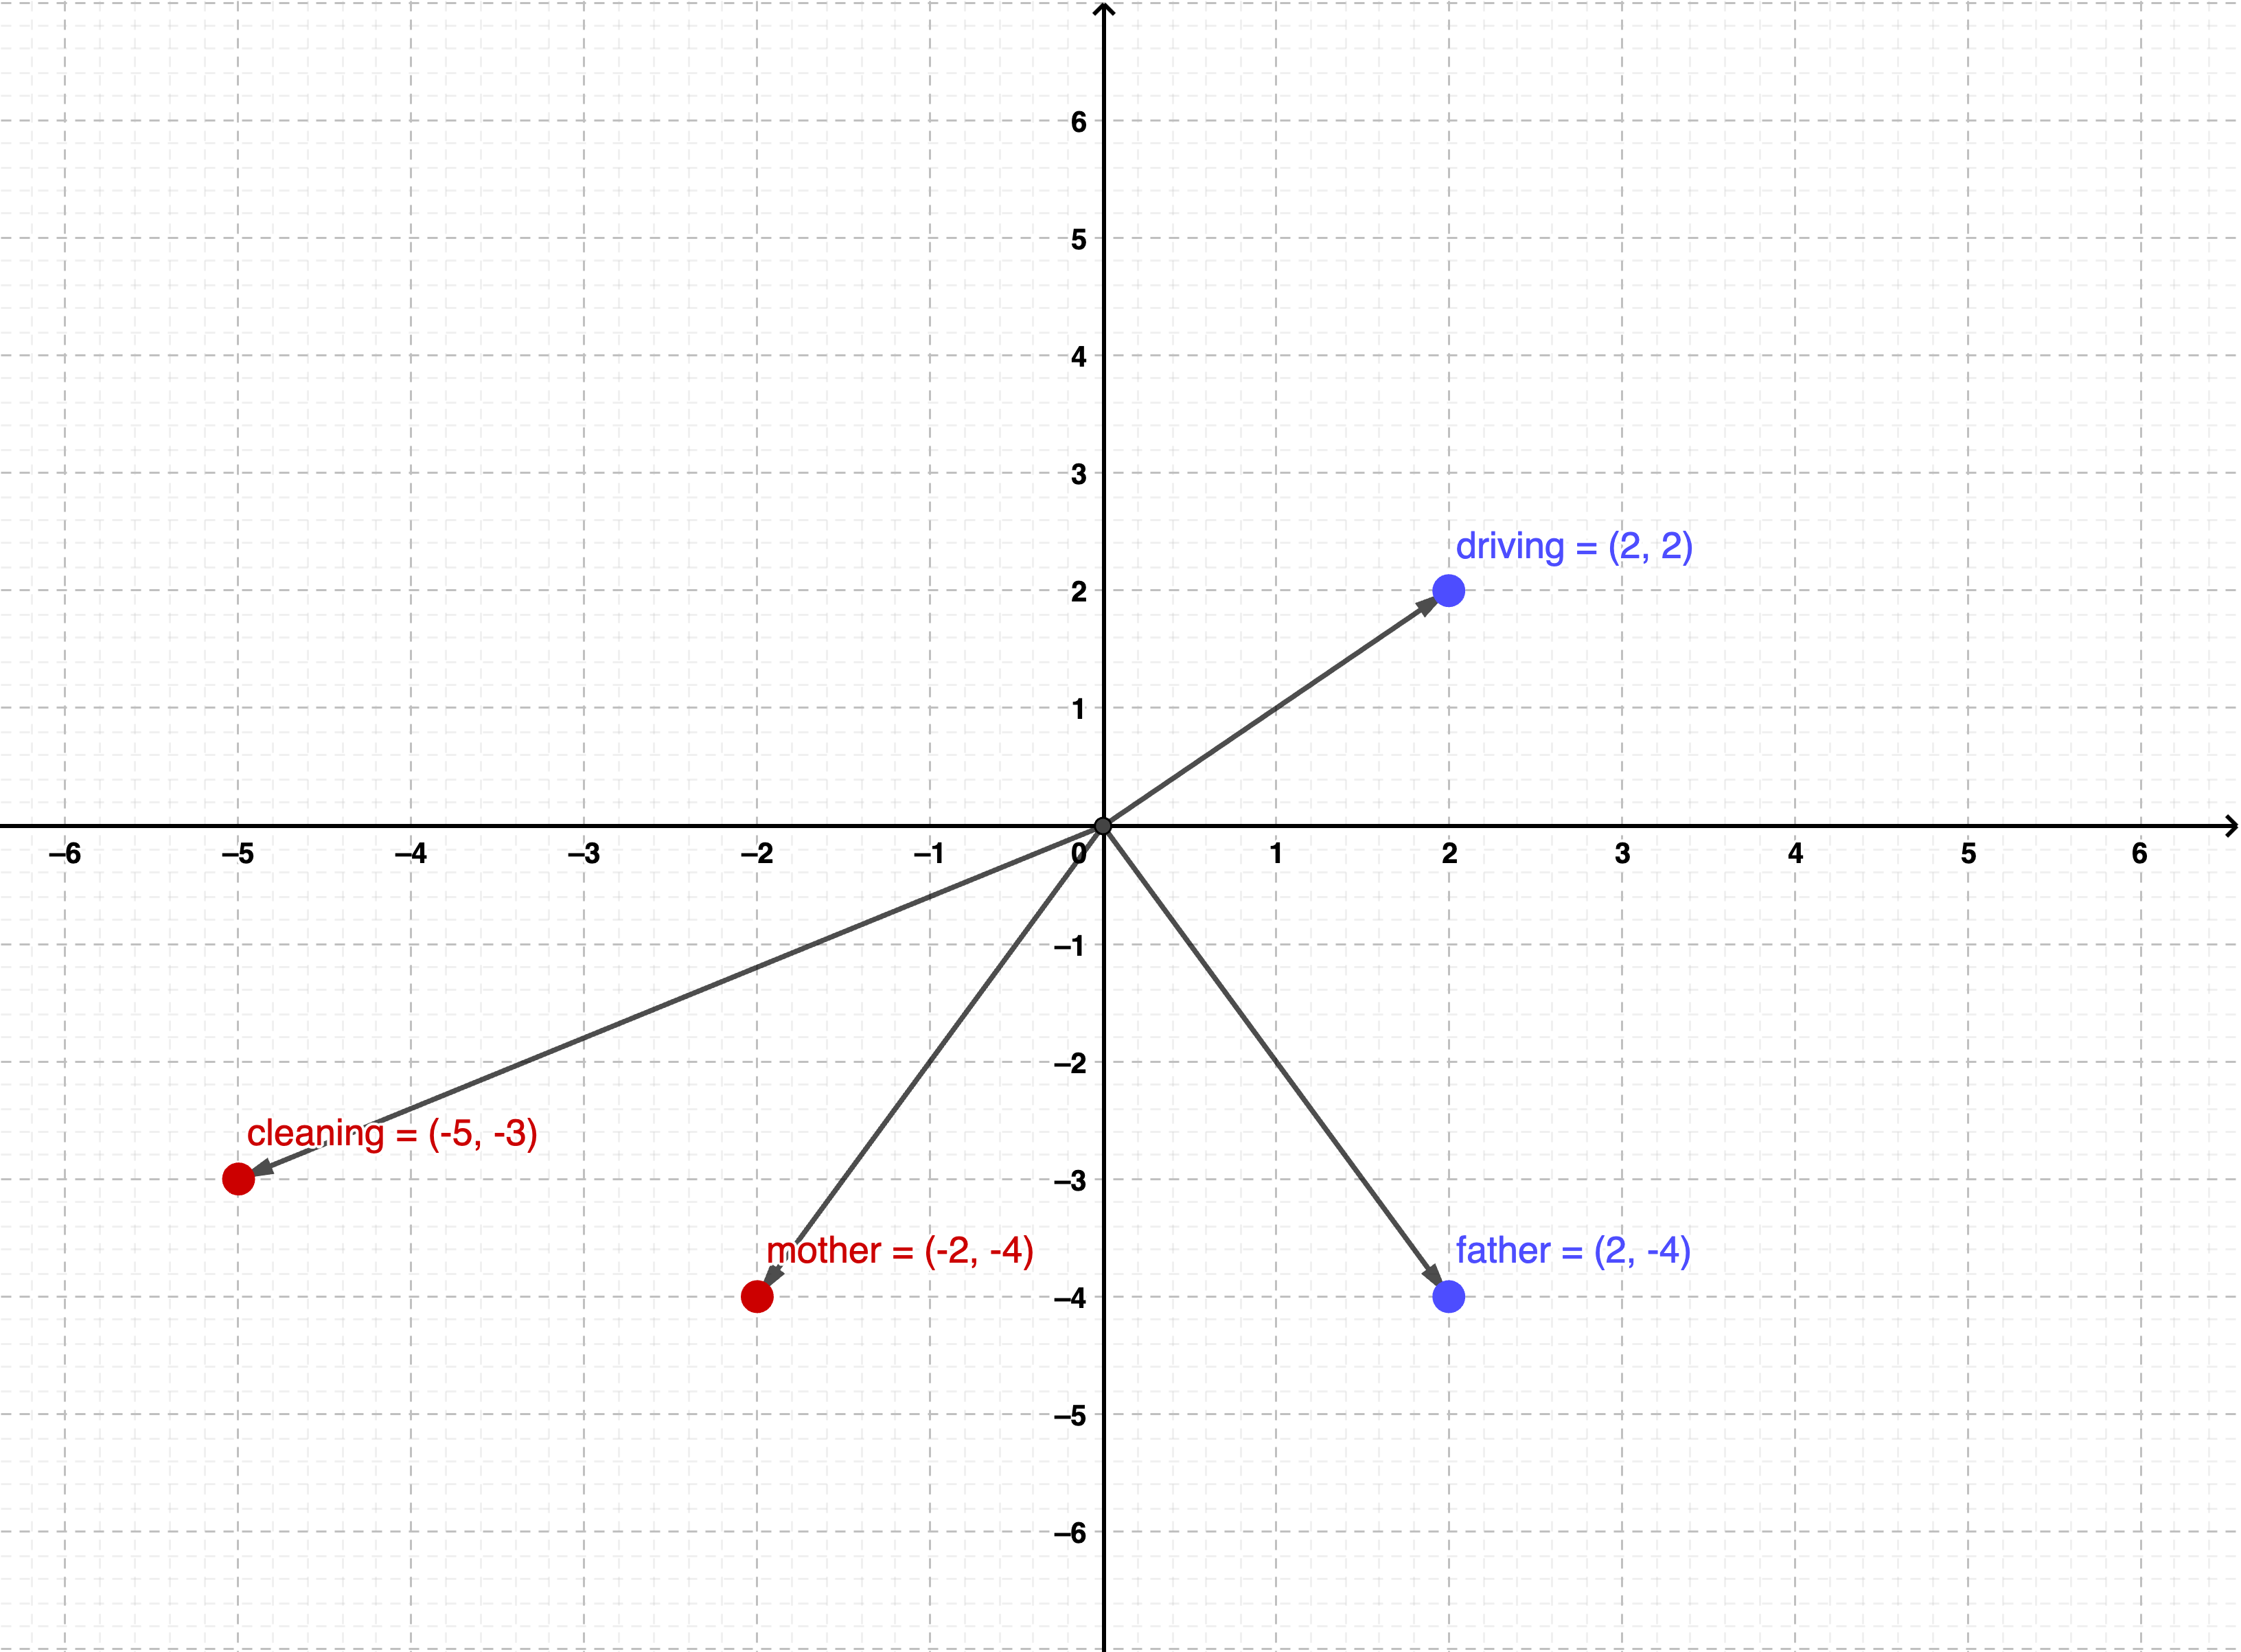

**Answer 1**

Your answer goes here.


## Task 2 - Implement Similarity Metrics

We can measure how similar are two words using cosine similarity. We would expect non-gender specific words to be equally distant from gender specific words.

There are other ways to measure similarity apart from cosine distance, like Levenshtein or Eucledean distance.

🎯 The goal is to get familiar with calculating various similarity methods using python and try to find similar words that are an example of bias and unbiased vectors.

Deliverables: Provide code for implementing a different distance metric in Python. Run the example words, and try measuring the distance of different words. Can you find a biased and an unbiased example? Compare it with your implementation of cosine distance. Does using a different distance metric affect the biased and unbiased examples?


To calculate cosine similarity, we need to take the cosine of the angle between these two vectors. Here are the steps:

1. Calculate the dot product of A and B
   - Multiply each element in A with the corresponding element in B
   - Sum all those products
   - Call this dot_product

2. Calculate the magnitudes (or lengths) of A and B
   - Square each element in A, sum them, and take the square root. Let's call this mag_A.
   - Do the same for B. Let's call this mag_B.

3. Compute cosine similarity:
   cosine_similarity = dot_product / (mag_A * mag_B)

The closer this value is to 1, the smaller the angle and the more similar document A is to document B.

Thanks to Python, you do not need to do these time-consuming calculations manually! Especially for step 1 and step 2, there is a library called 'numpy' with functions that can help you implement cosine distance in Python!

In [ ]:
def cosine_similarity(u, v):
    """
    Cosine similarity reflects the degree of similariy between u and v

    Arguments:
        u -- a word vector of shape (n,)
        v -- a word vector of shape (n,)

    Returns:
        cosine_similarity -- the cosine similarity between u and v defined by the formula above.
    """

    distance = 0.0

    ### START CODE HERE ###
    # Compute the dot product between u and v (≈1 line)

    # Compute the L2 norm of u (≈1 line)


    # Compute the L2 norm of v (≈1 line)

    # Compute the cosine similarity defined by formula (1) (≈1 line)

    ### END CODE HERE ###

    return cosine_similarity

In [ ]:
father = word_to_vec_map["father"]
mother = word_to_vec_map["mother"]
woman = word_to_vec_map["woman"]
man = word_to_vec_map["man"]


print("cosine_similarity(father, mother) = ", cosine_similarity(father, mother))
print("cosine_similarity(woman, man) = ",cosine_similarity(woman, man))
# print("cosine_similarity(mother - woman, father - man) = ",cosine_similarity(mother - woman, father - man))

cosine_similarity(father, mother) =  0.7901483260108081
cosine_similarity(woman, man) =  0.766401258505411
cosine_similarity(mother - woman, father - man) =  0.8135776693143248


In [ ]:
father = word_to_vec_map["father"]
mother = word_to_vec_map["mother"]
businesswoman = word_to_vec_map["businesswoman"]
businessman = word_to_vec_map["businessman"]


print("cosine_similarity(father, businessman) = ", cosine_similarity(father, businessman))
print("cosine_similarity(mother, businesswoman) = ",cosine_similarity(mother, businesswoman))


cosine_similarity(father, businessman) =  0.4185299766355399
cosine_similarity(mother, businesswoman) =  0.393455342273197
cosine_similarity(woman, businesswoman) =  1.0
cosine_similarity(man, businessman) =  0.9999999999999999


In [ ]:
man = word_to_vec_map["man"]
woman = word_to_vec_map["woman"]
nurse = word_to_vec_map["nurse"]
doctor = word_to_vec_map["doctor"]


print("cosine_similarity(man, doctor) = ", cosine_similarity(man, doctor))
print("cosine_similarity(woman, doctor) = ", cosine_similarity(woman, doctor))
print("cosine_similarity(woman, nurse) = ",cosine_similarity(woman, nurse))
print("cosine_similarity(man, nurse) = ",cosine_similarity(woman, nurse))
print("cosine_similarity(nurse, doctor) = ",cosine_similarity(nurse, doctor))



cosine_similarity(man, doctor) =  0.31448966252547894
cosine_similarity(woman, doctor) =  0.37945853647901046
cosine_similarity(woman, nurse) =  0.441355751621628
cosine_similarity(man, nurse) =  0.441355751621628
cosine_similarity(nurse, doctor) =  0.6319523990028815


## Task 3: Get familiar with Word Analogy task

Word analogy can be used as a task to detect bias in word vectors. In a word analogy task, we complete the sentence "a is to b as c is to ____". An example is 'man is to woman as king is to queen'. A biased example would be a 'man is to engineer as woman is to
homemaker'.


In detail, we are trying to find a word, such that the associated word vectors v1, v2, v3, v4 are related in the following manner: v2-v1 ~= v4-v3. We will measure the similarity between v2-v1 and v4-v3 using cosine similarity.

🎯 The goal is to get familiar with the word analogy task and provide examples. You should use the read_glove_vecs and cosine_similarity functions from the previous exercises.


Deliverables: Provide 2 examples of analogy pairs that can be considered gender bias and the algorithm doesn't give an expected answer, and 2 examples where the analogy is correct.



This is the code for computing word analogy given three words (word_a, word_b, word_c), or for example ('man', 'father', 'woman'), the following code find the word vector of a word that completes the analogy. In this example the word vector we expect is 'mother'.

In [ ]:
print("cosine_similarity(mother - woman, father - man) = ",cosine_similarity(woman - mother, man - father))

cosine_similarity(mother - woman, father - man) =  0.8135776693143248


In [ ]:
def complete_analogy(word_a, word_b, word_c, word_to_vec_map):
    """
    Performs the word analogy task as explained above: a is to b as c is to ____.

    Arguments:
    word_a -- a word, string
    word_b -- a word, string
    word_c -- a word, string
    word_to_vec_map -- dictionary that maps words to their corresponding vectors.

    Returns:
    best_word --  the word such that v_b - v_a is close to v_best_word - v_c, as measured by cosine similarity
    """

    # convert words to lower case
    word_a, word_b, word_c = word_a.lower(), word_b.lower(), word_c.lower()

    # Get the word embeddings v_a, v_b and v_c (≈1-3 lines)
    e_a, e_b, e_c = word_to_vec_map[word_a], word_to_vec_map[word_b], word_to_vec_map[word_c]

    words = word_to_vec_map.keys()
    max_cosine_sim = -100              # Initialize max_cosine_sim to a large negative number
    best_word = None                   # Initialize best_word with None, it will help keep track of the word to output

    # loop over the whole word vector set
    for w in words:
        # to avoid best_word being one of the input words, pass on them.
        if w in [word_a, word_b, word_c] :
            continue

        ### START CODE HERE ###
        # Compute cosine similarity between the vector (e_b - e_a) and the vector ((w's vector representation) - e_c)  (≈1 line)

        # If the cosine_sim is more than the max_cosine_sim seen so far,
            # then: set the new max_cosine_sim to the current cosine_sim and the best_word to the current word (≈3 lines)

        ### END CODE HERE ###

    return best_word

Here is an example of how we could use the code above:

In [ ]:
triads_to_try = [('man', 'father', 'woman'), ('man', 'doctor', 'woman'), ('father', 'businessman', 'mother'), ('man', 'engineer', 'woman')]
for triad in triads_to_try:
    print ('{} -> {} :: {} -> {}'.format( *triad, complete_analogy(*triad,word_to_vec_map)))

man -> father :: woman -> mother
man -> doctor :: woman -> doctors
father -> businessman :: mother -> businesswoman
man -> engineer :: woman -> engineering


As part of Exercise 6 you need to find some other analogy pairs that do work, but also find some where the algorithm doesn't give the right answer.

In [ ]:
# Add your examples in the []
triads_to_try = []
for triad in triads_to_try:
    print ('{} -> {} :: {} -> {}'.format( *triad, complete_analogy(*triad,word_to_vec_map)))